# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|






|: ------------- |:-------------|

|Loan_ID| Unique Loan ID|

|Gender| Male/ Female|

|Married| Applicant married (Y/N)|

|Dependents| Number of dependents|

|Education| Applicant Education (Graduate/ Under Graduate)|

|Self_Employed| Self employed (Y/N)|

|ApplicantIncome| Applicant income|

|CoapplicantIncome| Coapplicant income|

|LoanAmount| Loan amount in thousands|

|Loan_Amount_Term| Term of loan in months|

|Credit_History| credit history meets guidelines|

|Property_Area| Urban/ Semi Urban/ Rural|

|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [61]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('../data/data.csv') 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Look at some basic statistics for numerical variables.

In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [4]:
for col in df.select_dtypes('object'):
    print(col, 'has', str((df[col].nunique())), 'unique values')

Loan_ID has 614 unique values
Gender has 2 unique values
Married has 2 unique values
Dependents has 4 unique values
Education has 2 unique values
Self_Employed has 2 unique values
Property_Area has 3 unique values
Loan_Status has 2 unique values


In [5]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [6]:
exclude_id = df.drop('Loan_ID',axis=1)
for col in exclude_id.select_dtypes('object'):
    print('Breakdown of value frequency in', col, ':')
    for n in range(exclude_id[col].nunique()):
        print(f'\tThe value "{exclude_id[col].value_counts().index[n]}" occurs {exclude_id[col].value_counts().values[n]} times.')

Breakdown of value frequency in Gender :
	The value "Male" occurs 489 times.
	The value "Female" occurs 112 times.
Breakdown of value frequency in Married :
	The value "Yes" occurs 398 times.
	The value "No" occurs 213 times.
Breakdown of value frequency in Dependents :
	The value "0" occurs 345 times.
	The value "1" occurs 102 times.
	The value "2" occurs 101 times.
	The value "3+" occurs 51 times.
Breakdown of value frequency in Education :
	The value "Graduate" occurs 480 times.
	The value "Not Graduate" occurs 134 times.
Breakdown of value frequency in Self_Employed :
	The value "No" occurs 500 times.
	The value "Yes" occurs 82 times.
Breakdown of value frequency in Property_Area :
	The value "Semiurban" occurs 233 times.
	The value "Urban" occurs 202 times.
	The value "Rural" occurs 179 times.
Breakdown of value frequency in Loan_Status :
	The value "Y" occurs 422 times.
	The value "N" occurs 192 times.


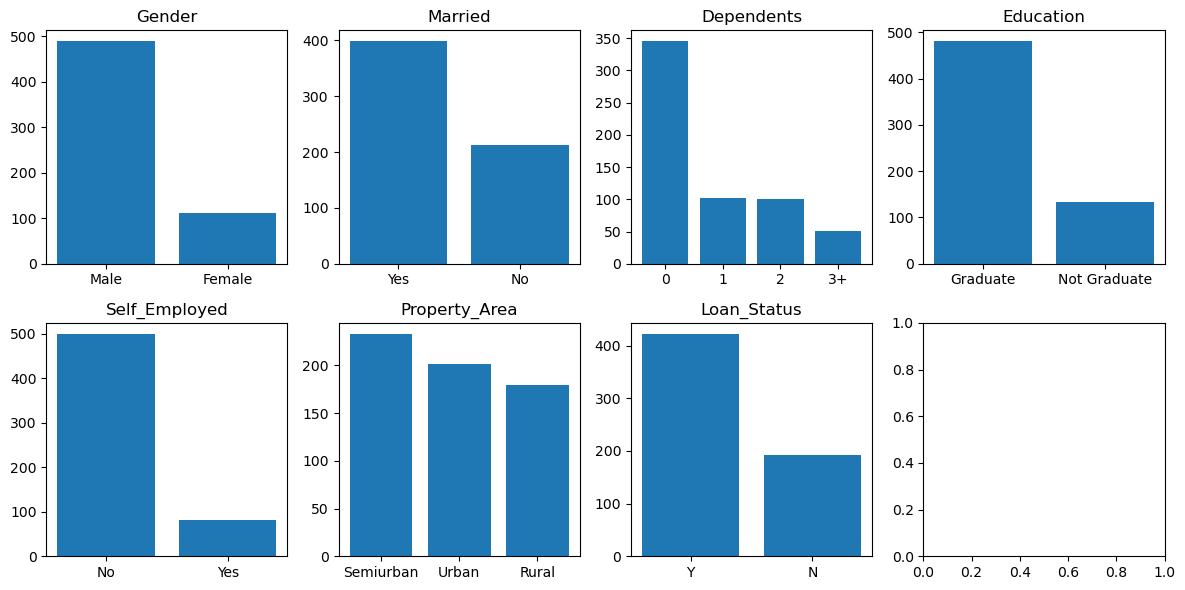

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))
for i, col in enumerate(exclude_id.select_dtypes('object')):
    rowPlace = i // 4
    colPlace = i % 4
    value_counts = exclude_id[col].value_counts()
    axes[rowPlace, colPlace].bar(value_counts.index, value_counts.values)
    axes[rowPlace, colPlace].set_title(col)
plt.tight_layout()
plt.show()

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



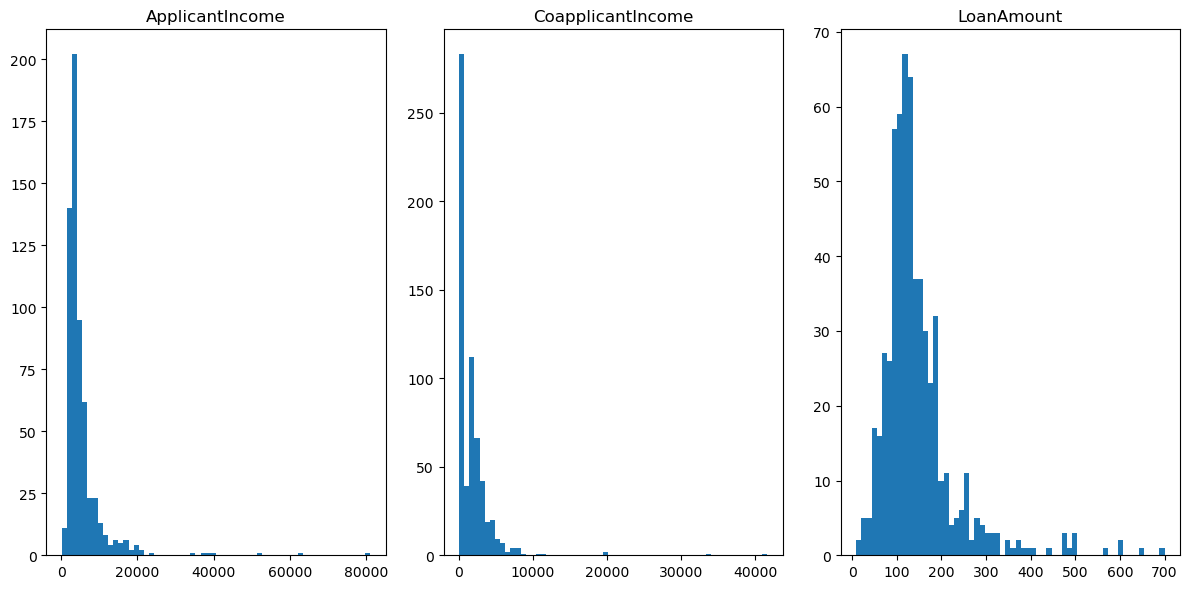

In [8]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
bins = 60
for i, col in enumerate(cols):
    axes[i].hist(df[col],bins=bins)
    axes[i].set_title(col)
plt.tight_layout()
plt.show()


Look at box plots to understand the distributions. 

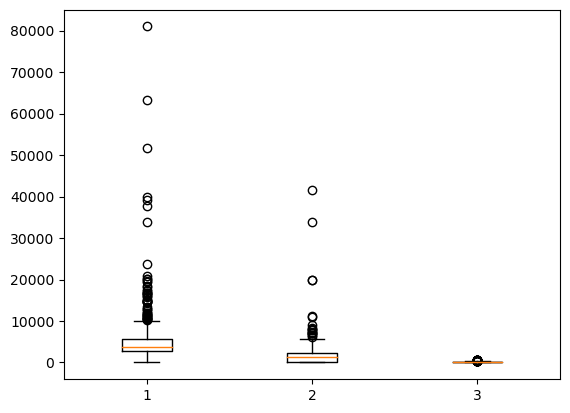

In [9]:
plt.boxplot(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].dropna())
plt.show()

Look at the distribution of income segregated  by `Education`

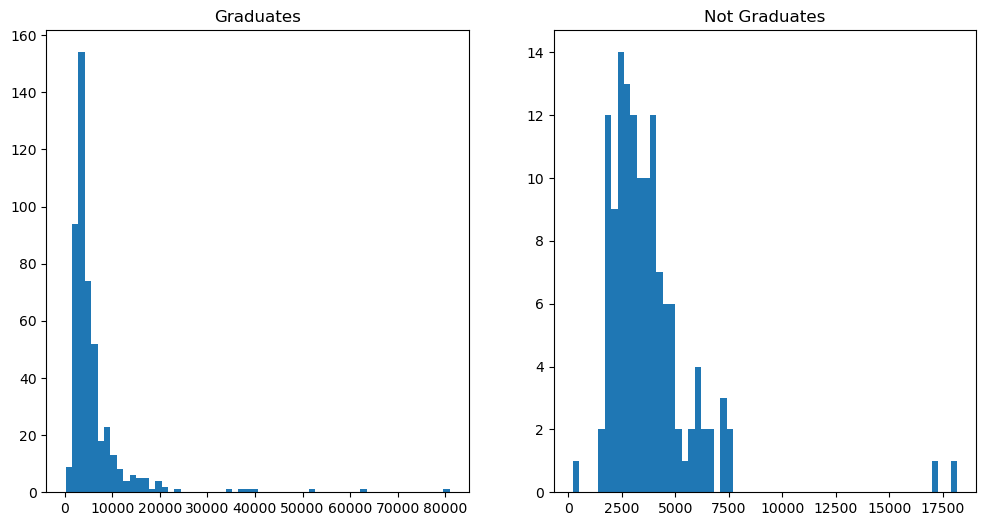

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
bins = 60
axes[0].hist(df[df['Education'] == "Graduate"].ApplicantIncome,bins=bins)
axes[0].set_title('Graduates')
axes[1].hist(df[df['Education'] == "Not Graduate"].ApplicantIncome,bins=bins)
axes[1].set_title('Not Graduates')
plt.show()

Look at the histogram and boxplot of LoanAmount

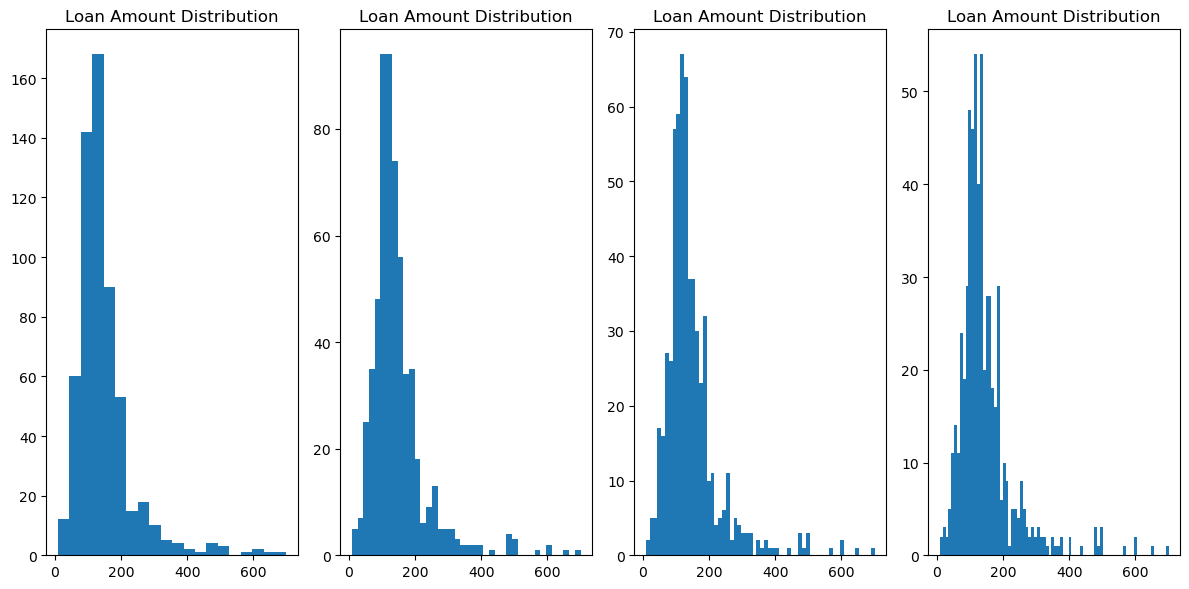

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 6))
bins = [20,40,60,80]
for i,_ in enumerate(bins):
    axes[i].hist(df.LoanAmount, bins=bins[i])
    axes[i].set_title('Loan Amount Distribution')
plt.tight_layout()
plt.show()

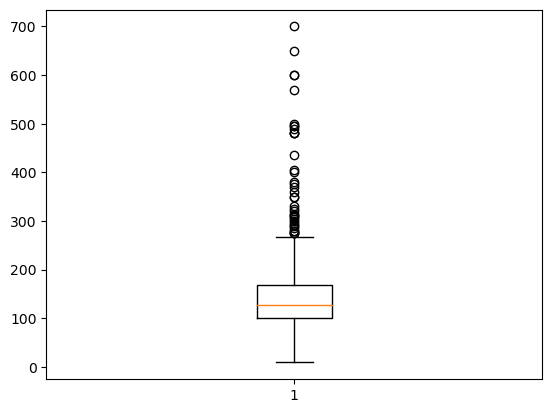

In [12]:
plt.boxplot(df['LoanAmount'].dropna())
plt.show()

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [13]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
df.pivot_table(values=['ApplicantIncome','LoanAmount','Loan_Amount_Term','Education','CoapplicantIncome'],index='Loan_Status',columns=['Gender'])

ApplicantIncome              CoapplicantIncome               \
Gender               Female         Male            Female         Male   
Loan_Status                                                               
N               4091.351351  5859.240000       1682.783784  1936.226667   
Y               4915.853333  5263.814159        824.453333  1657.403894   

             LoanAmount             Loan_Amount_Term              
Gender           Female        Male           Female        Male  
Loan_Status                                                       
N            128.694444  157.878571       351.000000  341.793103  
Y            125.712329  145.612121       352.931507  338.738739

In [15]:
df.pivot_table(values=['ApplicantIncome','LoanAmount','Loan_Amount_Term','Education','CoapplicantIncome'],index='Credit_History',columns=['Gender'])

ApplicantIncome              CoapplicantIncome               \
Gender                  Female         Male            Female         Male   
Credit_History                                                               
0.0                3804.411765  6253.188406       1136.470588  1622.246377   
1.0                5013.488095  5323.400524        626.642857  1739.028586   

                LoanAmount             Loan_Amount_Term              
Gender              Female        Male           Female        Male  
Credit_History                                                       
0.0             124.375000  153.045455       367.500000  334.687500  
1.0             126.439024  146.520436       350.487805  340.595745

In [16]:
df.pivot_table(values=['ApplicantIncome','LoanAmount','Loan_Amount_Term','Education','CoapplicantIncome'],index='Property_Area',columns=['Gender'])

ApplicantIncome              CoapplicantIncome               \
Gender                 Female         Male            Female         Male   
Property_Area                                                               
Rural             4353.375000  5691.291391        522.541667  1807.643179   
Semiurban         4787.272727  5412.529070        937.800000  1711.901163   
Urban             4614.787879  5258.909639       1817.484848  1716.221687   

               LoanAmount             Loan_Amount_Term              
Gender             Female        Male           Female        Male  
Property_Area                                                       
Rural          122.041667  155.882759       370.000000  341.142857  
Semiurban      135.245283  148.420118       344.727273  347.431953  
Urban          116.031250  144.032051       352.000000  330.222222

In [17]:
df.pivot_table(values=['ApplicantIncome','LoanAmount','Loan_Amount_Term','Education','CoapplicantIncome'],index='Self_Employed',columns=['Loan_Status'])

ApplicantIncome              CoapplicantIncome               \
Loan_Status                 N            Y                 N            Y   
Self_Employed                                                               
No                5397.592357  4890.530612       1682.445860  1534.550787   
Yes               6081.076923  7984.267857       1809.923077  1358.071429   

              LoanAmount             Loan_Amount_Term              
Loan_Status            N           Y                N           Y  
Self_Employed                                                      
No             149.47973  138.323353       346.728477  341.715976  
Yes            156.36000  179.240741       330.000000  339.333333

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [3]:
from modules.cleaning import fill_values
df = fill_values(df)

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

In [7]:
df.LoanAmount = np.log(df.LoanAmount)
df.LoanAmount.describe()

count    614.000000
mean       4.862066
std        0.496575
min        2.197225
25%        4.607658
50%        4.859812
75%        5.104426
max        6.551080
Name: LoanAmount, dtype: float64

Combine both incomes as total income and take a log transformation of the same.

In [8]:
df['total_income'] = df.ApplicantIncome + df.CoapplicantIncome
df.total_income = np.log(df.total_income)
df.total_income.describe()

count    614.000000
mean       8.669414
std        0.545102
min        7.273786
25%        8.334712
50%        8.597205
75%        8.925549
max       11.302204
Name: total_income, dtype: float64

## 4. Building a Predictive Model

In [5]:
cols = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'total_income']

In [9]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
xgb = XGBClassifier()
X = pd.get_dummies(df[cols],drop_first=True)
y = df.Loan_Status.map({'N':0,'Y':1})

In [164]:
x_train,x_test,y_train,y_test = train_test_split(X,y)
xgb.fit(x_train,y_train)
y_predDefault = xgb.predict(x_test)

In [29]:
from modules.eval import print_scores
print_scores(y_test,y_predDefault)

R squared: 0.3038522012578615 

accuracy: 0.8506493506493507
precision: 0.8429752066115702
recall: 0.9622641509433962
f1: 0.8986784140969164
auc: 0.7832154088050315
confusion:
 [[ 29  19]
 [  4 102]]


Try paramater grid search to improve the results

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [5,6,7,8],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.3,0.5, 0.8],
    'colsample_bytree': [0.3,0.5, 0.8],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0.1, 1.0, 10.0]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X, y)

print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

Best parameters found:
```python
{'colsample_bytree': 0.5,
'gamma': 0,
'learning_rate': 0.1,
'max_depth': 5, 
'n_estimators': 200, 
'reg_alpha': 0.5, 
'reg_lambda': 10.0, 
'subsample': 0.3}
```
Best score found: 0.8322804211648676

In [170]:
bestParams = {
    'colsample_bytree': 0.5,
    'gamma': 0,
    'learning_rate': 0.1,
    'max_depth': 5, 
    'n_estimators': 200, 
    'reg_alpha': 0.5, 
    'reg_lambda': 10.0, 
    'subsample': 0.3
}
xgb = XGBClassifier(**bestParams)
x_train,x_test,y_train,y_test = train_test_split(X,y)
xgb.fit(x_train,y_train)
y_predBest = xgb.predict(x_test)

print_scores(y_test,y_predBest)

R squared: 0.30000000000000004 

accuracy: 0.8571428571428571
precision: 0.84375
recall: 0.9818181818181818
f1: 0.9075630252100839
auc: 0.7636363636363637
confusion:
 [[ 24  20]
 [  2 108]]


In [171]:
print_scores(y_test,y_predBest,compare=True,y_predOld=y_predDefault)

R squared increased by: 1.1772727272727272 

accuracy increased by: 0.24025974025974017
precision increased by: 0.12580128205128205
recall increased by: 0.21818181818181814
f1 increased by: 0.1674749194832117
auc increased by: 0.25681818181818183
confusion matrix difference:
 [[ 13 -13]
 [-24  24]]


## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

class LogTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_log = np.log(X[['LoanAmount', 'total_income']])
        X.drop(['LoanAmount', 'total_income'], axis=1, inplace=True)
        return pd.concat([X, X_log], axis=1)

categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
preprocess = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(drop='first', sparse=False), categorical_cols),
        ('log',LogTransformer(),['LoanAmount','total_income'])
    ],remainder='passthrough')
params = {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'reg_alpha': 0.5, 'reg_lambda': 10.0, 'subsample': 0.3}

pipeline = Pipeline(steps=[('preprocess', preprocess),
                           ('classifier', XGBClassifier(**params))])

In [34]:
X = df[['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'total_income']]
y = df.Loan_Status.map({'N':0,'Y':1})
x_train,x_test,y_train,y_test = train_test_split(X,y)

pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)
print_scores(y_test,y_pred)

R squared: 0.2450980392156863 

accuracy: 0.8311688311688312
precision: 0.8015873015873016
recall: 0.9901960784313726
f1: 0.8859649122807018
auc: 0.7547134238310709
confusion:
 [[ 27  25]
 [  1 101]]


In [32]:
import pickle
with open('../src/loan_XGBClass_pipe.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [36]:
import requests


In [59]:
url = 'http://ec2-34-209-210-59.us-west-2.compute.amazonaws.com:5000/prediction'
params = {
    'Gender': 'Male',
    'Married': 'Yes',
    'Dependents': '0',
    'Education': 'Graduate',
    'Self_Employed': 'No',
    'LoanAmount': 10,
    'Loan_Amount_Term': 360,
    'Credit_History': 1,
    'Property_Area': 'Urban',
    'total_income': 6000
    }
response = requests.post(url = url,json=params)

In [60]:
response.text

'"We can get you approved!"\n'

![failed to load](https://cdn.discordapp.com/attachments/1046174858372972594/1081083151583031316/image.png)


![failed to load](https://cdn.discordapp.com/attachments/1046174858372972594/1081083266897018960/image.png)

![failed to load](https://cdn.discordapp.com/attachments/1046174858372972594/1081083382454296647/image.png)